## Project Description

The gym chain model fitness is developing a customer interaction strategy based on analytical data. Their major problem in customer churn. To fight churn, Model Fitness has digitised a number of its customer profiles

**Task: Analyse customer profiles and come up with customer retention strategy**

### Data Description

Current dataset fields:
1. 'gender'
2. 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
3. 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
4. Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
5. 'Phone' — whether the user provided their phone number
6. 'Age'
7. 'Lifetime' — the time (in months) since the customer first came to the gym

Data from the log of visits and purchases and data on current membership status

8. 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
9. 'Month_to_end_contract' — the months remaining until the contract expires
10. 'Group_visits' — whether the user takes part in group sessions
11. 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
12. 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
13. 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

In [1]:
# !pip install missingno
# !pip install -U seaborn
# !pip install -U scikit-learn==0.22.1
# !pip install -U imbalanced-learn
# !pip install --upgrade kneed

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import roc_curve, recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

plt.style.use('seaborn')

In [3]:
#reading the file

gym = pd.read_csv('gym_churn_us.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym.shape

(4000, 14)

In [5]:
#lowercase all column names 

gym.columns = gym.columns.str.lower()
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

### Exploratory Data Analaysis

In [6]:
#General info

gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

<AxesSubplot:>

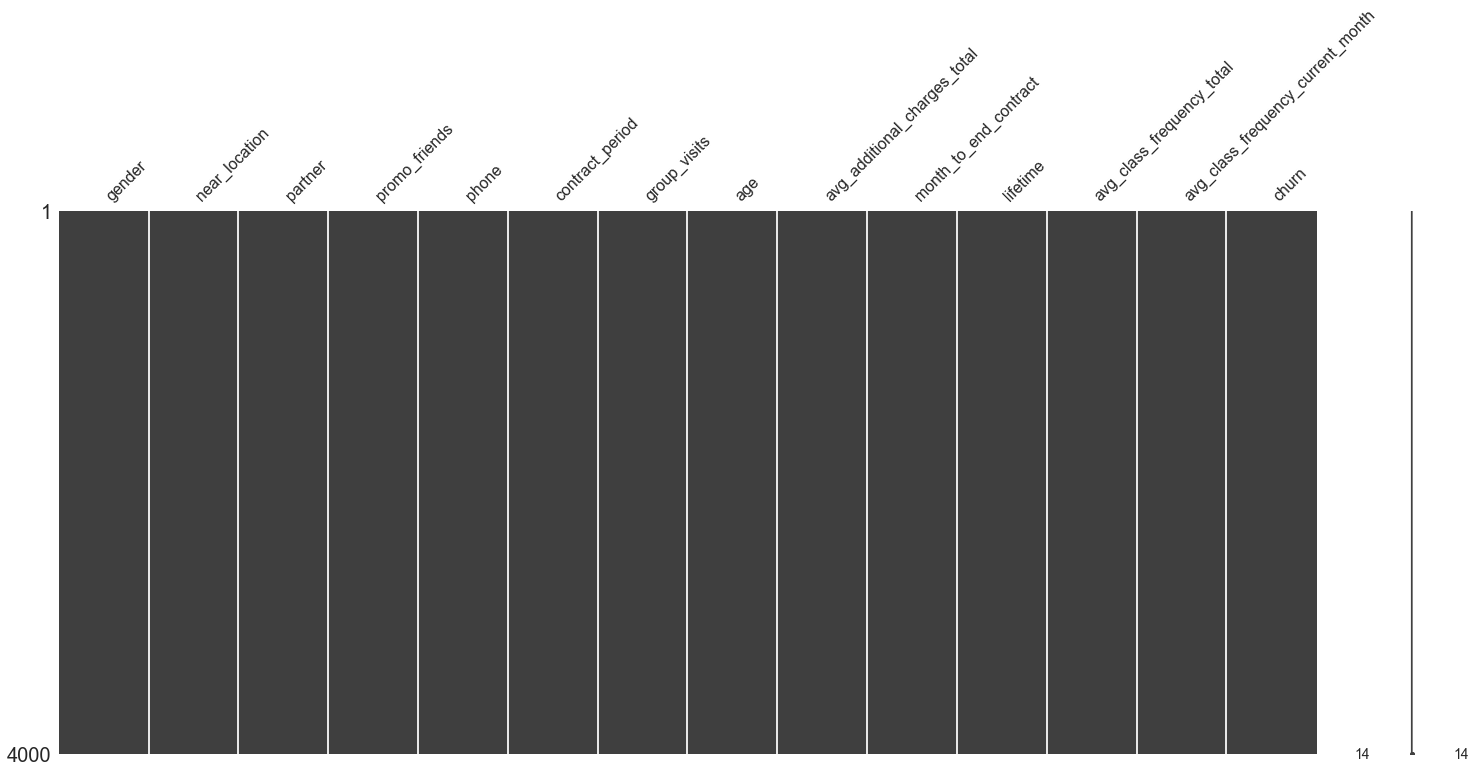

In [7]:
msno.matrix(gym)

> - Since all the bars are of equal lenght and there is no distorted pattern, it can be shown that there are no missing values in the dataset

In [8]:
#Descriptive statistics

gym.describe(include = 'all')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
#mean values for both groups 

gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


>  - The mean of some of the features vary significantly between the two categories of customers whereas for some features its almost the same. This might give a hint on which features are of importance for churn prediction

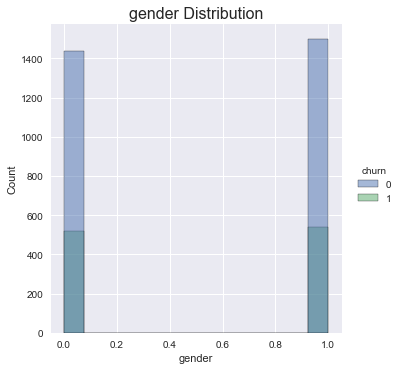

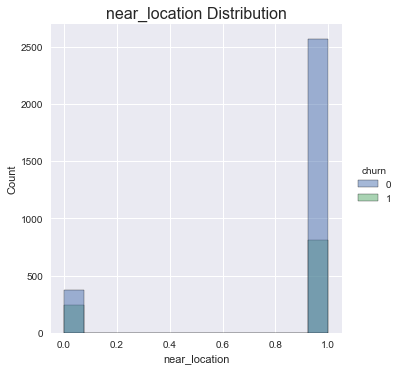

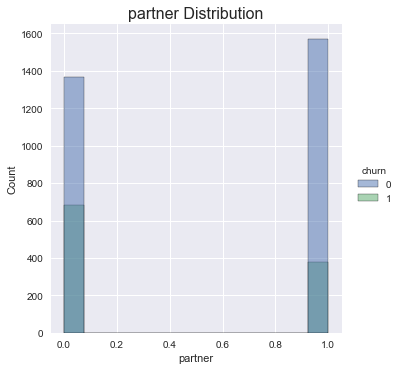

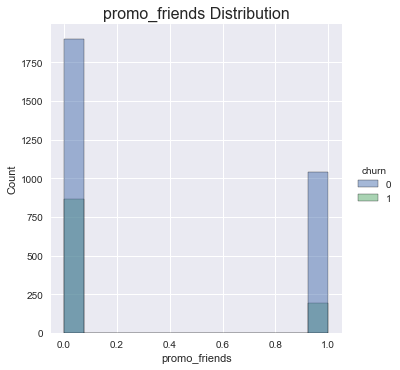

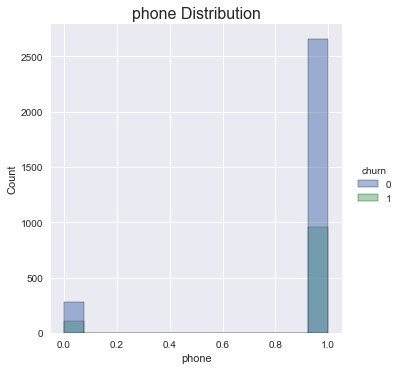

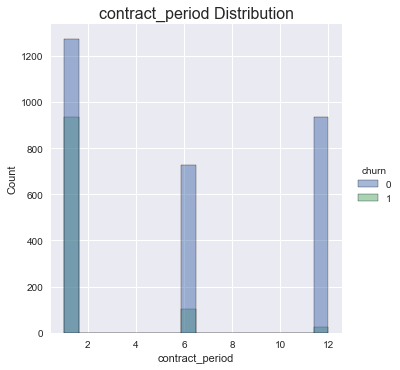

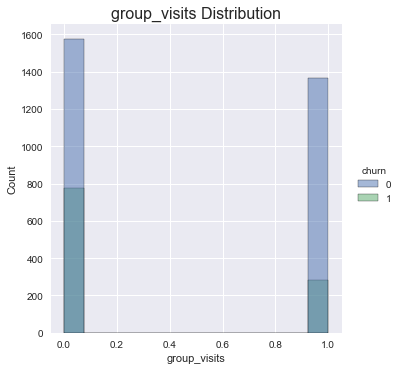

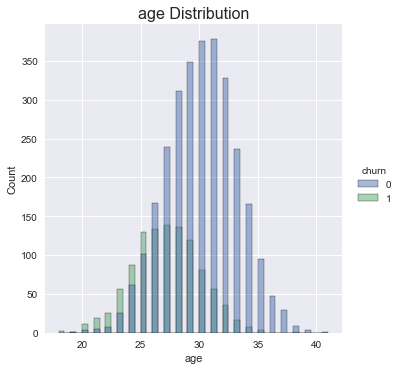

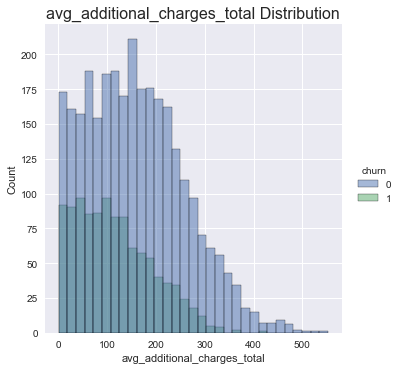

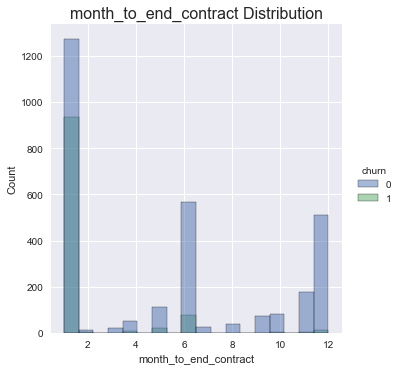

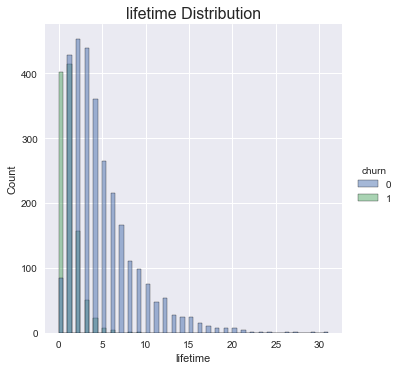

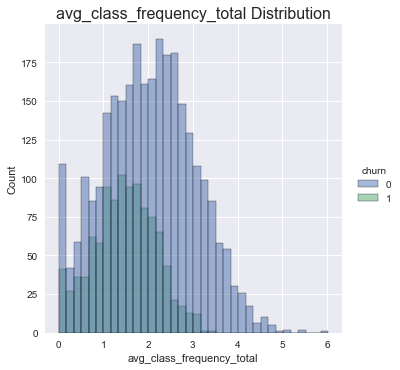

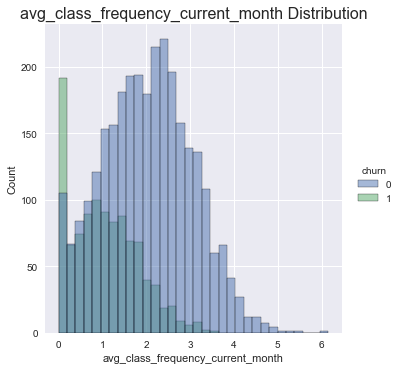

In [10]:
for i in gym.columns.drop('churn'):
    sns.displot(gym, x=i, hue='churn', color = 'viridis')
    plt.title(i + ' Distribution', fontsize= 16)

> - Gender doesn’t have any impact on churn rate. About 70% of the customers who stay far away from the gym churned. 
The churn rate is more for those customers without any discounts
> - Mostly new customers tend to churn. As lifetime increases, the churn rate decreases. 
> - Customers who do not participate in the group sessions churn more compared to the other category. 
> - Normally, the highest churn rate come from the customer aging between 26-28
> - Customer who usually spend less on additional services churn. 


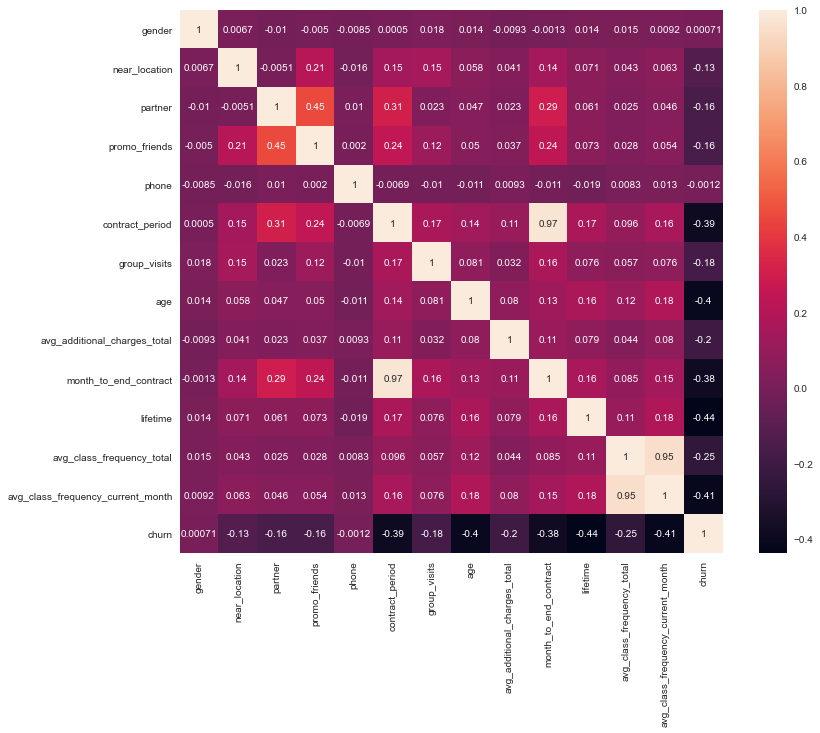

In [11]:
cm = gym.corr()

plt.figure(figsize=(13,10))
sns.heatmap(cm, annot=True, square = True)
plt.show()


> - A threshold of 0.8 is considered. Since the columns contract_period correlates with month_to_end_contract and avg_class_frequency_current_month correlates with avg_class_frequency total, one of these columns can be removed to avoid problems during model building 

In [12]:
gym.drop(['month_to_end_contract','avg_class_frequency_current_month'],axis = 1, inplace = True)

In [13]:
gym.shape

(4000, 12)

### Classification

#### Models without smote

In [14]:
# splitting data into train and test 

x = gym.drop('churn', axis = 1)
y = gym.churn

x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [15]:
#Standardize all the variables 

scaler = StandardScaler()

x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

In [16]:
models = [DecisionTreeClassifier(random_state = 0), RandomForestClassifier(random_state = 0), GradientBoostingClassifier(random_state = 0), LogisticRegression(random_state = 0)]

In [17]:
def find_model(m,x_train,y_train,x_test,y_test):
    model = m
    model.fit(x_train_st, y_train)
    
    predictions = model.predict(x_test_st)
    
    
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(type(m).__name__, fontsize=16)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1score = f1_score(y_test, predictions)
    
    best_model[type(m).__name__] = f1score
    
    print(f"{type(m).__name__}: \n Accuracy :{accuracy},\n precision :{precision},\n recall : {recall},\n F1 score : {f1score}")
    print('')
    print('')

DecisionTreeClassifier: 
 Accuracy :0.8275,
 precision :0.6351351351351351,
 recall : 0.7121212121212122,
 F1 score : 0.6714285714285715


RandomForestClassifier: 
 Accuracy :0.89,
 precision :0.7864583333333334,
 recall : 0.7626262626262627,
 F1 score : 0.7743589743589744


GradientBoostingClassifier: 
 Accuracy :0.89875,
 precision :0.8,
 recall : 0.7878787878787878,
 F1 score : 0.7938931297709925


LogisticRegression: 
 Accuracy :0.89875,
 precision :0.7881773399014779,
 recall : 0.8080808080808081,
 F1 score : 0.7980049875311721


The best classifier according to F1 score is : LogisticRegression


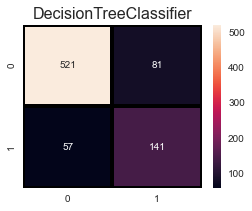

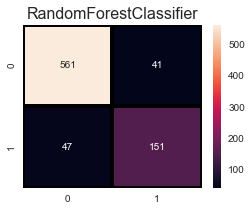

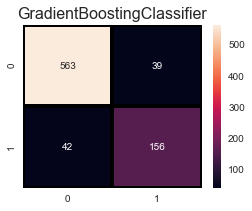

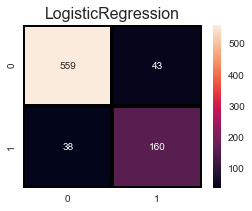

In [18]:
best_model = {}

for m in models:
    find_model(m,x_train_st,y_train,x_test_st,y_test)

print('The best classifier according to F1 score is : {}'.format(max(best_model, key=best_model.get)))

> - Since we have a problem with class imbalance , accuracy is not considered to be a good measure for generalisation. 
Therefore the best alternative is F1 score 
> - Based on F1 score , the best results are given by LogisticRegression

#### Models with smote

In [19]:
sm = SMOTE(random_state=0)

x_sm, y_sm = sm.fit_resample(x, y)

In [20]:
y_sm.value_counts(normalize = True)

0    0.5
1    0.5
Name: churn, dtype: float64

In [21]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.20, random_state=0)

In [22]:
x_train_sm_st = scaler.fit_transform(x_train_sm)
x_test_sm_st = scaler.transform(x_test_sm)

DecisionTreeClassifier: 
 Accuracy :0.8275,
 precision :0.6351351351351351,
 recall : 0.7121212121212122,
 F1 score : 0.6714285714285715


RandomForestClassifier: 
 Accuracy :0.89,
 precision :0.7864583333333334,
 recall : 0.7626262626262627,
 F1 score : 0.7743589743589744


GradientBoostingClassifier: 
 Accuracy :0.89875,
 precision :0.8,
 recall : 0.7878787878787878,
 F1 score : 0.7938931297709925


LogisticRegression: 
 Accuracy :0.89875,
 precision :0.7881773399014779,
 recall : 0.8080808080808081,
 F1 score : 0.7980049875311721


The best classifier according to F1 score is : LogisticRegression


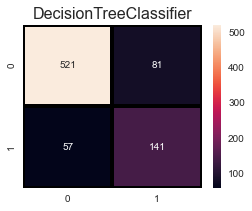

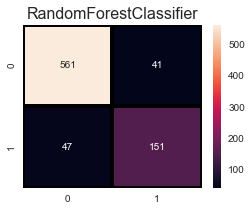

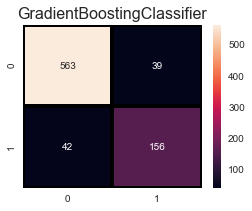

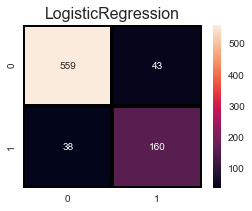

In [23]:
best_model = {}

for m in models:
    find_model(m,x_train_sm_st,y_train,x_test_sm_st,y_test)

print('The best classifier according to F1 score is : {}'.format(max(best_model, key=best_model.get)))

> - Using SMOTE , the minority class label was oversampled to address the class imbalance problem and then the models were trained again using the oversampled data. The results for some of the classifiers improved, although not significantly
> - Since the classes are balanced, accuracy can be considered as a good measure to select the best classifier. In this case, Logisticregression and GradientBoostingClassifier both perfrom equally. However, based on f1 score, LogisticRegression turns out to be the best model

### Clustering

In [24]:
#droppin class labels
features = gym.drop('churn',axis=1)
true_label = gym.churn

In [25]:
data_scaled = normalize(features)
data_scaled = pd.DataFrame(data_scaled, columns=features.columns)
data_scaled.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total
0,0.030242,0.030242,0.030242,0.030242,0.000000,0.181450,0.030242,0.877009,0.430263,0.090725,0.000617
1,0.000000,0.008459,0.000000,0.000000,0.008459,0.101507,0.008459,0.262226,0.957574,0.059212,0.016266
2,0.000000,0.007548,0.007548,0.000000,0.007548,0.007548,0.000000,0.211344,0.977078,0.015096,0.014032
3,0.000000,0.013895,0.013895,0.013895,0.013895,0.166734,0.013895,0.458520,0.870769,0.027789,0.044541
4,0.004998,0.004998,0.004998,0.004998,0.004998,0.004998,0.000000,0.129935,0.991318,0.014993,0.005567


#### Hierarchical clustering 

In [26]:
# plt.figure(figsize=(10, 7))  
# plt.title("Dendrograms")  
# dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))

In [35]:
sample = data_scaled.sample(n= 200,random_state = 0)

sample.shape

(200, 12)

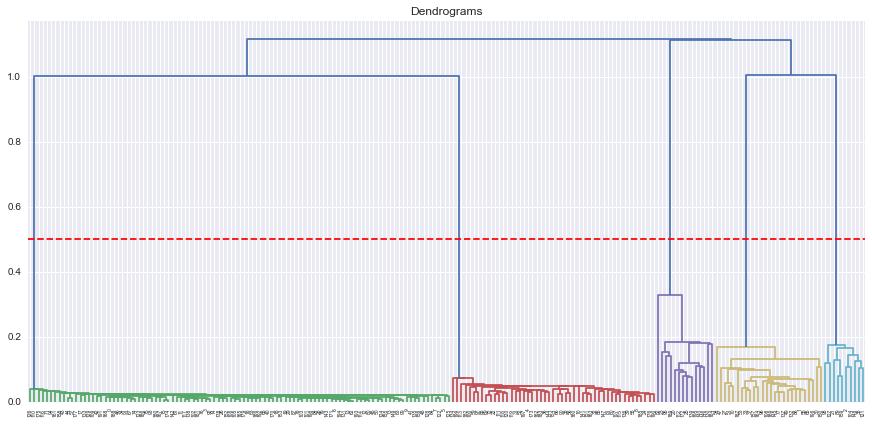

In [36]:
plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(sample, method='single'))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

> - A sample was drawn randomly from the dataset to plot a dendogram to find the number of clusters 
> - Based on the cut on the dendogram, 5 clusters are chosen for agglomerative hierarchical clustering 

#### K Means for n_clusters

In [29]:
kmeans = KMeans(init = 'random',n_init = 10,n_clusters = 5, random_state = 0)
kmeans.fit(data_scaled)

KMeans(init='random', n_clusters=5, random_state=0)

In [30]:
data_scaled['clusters'] = kmeans.fit_predict(data_scaled)
data_scaled.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,clusters
0,0.030242,0.030242,0.030242,0.030242,0.000000,0.181450,0.030242,0.877009,0.430263,0.090725,0.000617,4
1,0.000000,0.008459,0.000000,0.000000,0.008459,0.101507,0.008459,0.262226,0.957574,0.059212,0.016266,0
2,0.000000,0.007548,0.007548,0.000000,0.007548,0.007548,0.000000,0.211344,0.977078,0.015096,0.014032,1
3,0.000000,0.013895,0.013895,0.013895,0.013895,0.166734,0.013895,0.458520,0.870769,0.027789,0.044541,3
4,0.004998,0.004998,0.004998,0.004998,0.004998,0.004998,0.000000,0.129935,0.991318,0.014993,0.005567,1


In [31]:
# The lowest SSE value
kmeans.inertia_

38.44946840285159

In [32]:
data_scaled.groupby('clusters').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total
clusters,,,,,,,,,,,
0,0.005003,0.008196,0.004480,0.002717,0.008743,0.041898,0.003950,0.282209,0.954303,0.035216,0.017975
1,0.002460,0.004099,0.002356,0.001529,0.004395,0.022808,0.002022,0.140101,0.988420,0.017844,0.009111
2,0.012789,0.020760,0.012829,0.006989,0.023498,0.100437,0.009769,0.746917,0.623463,0.089442,0.048962
3,0.008524,0.014467,0.008080,0.004788,0.015748,0.073546,0.006377,0.491158,0.856226,0.054587,0.030998
4,0.017215,0.025606,0.016400,0.010981,0.027788,0.136125,0.013584,0.929051,0.223195,0.111597,0.058237


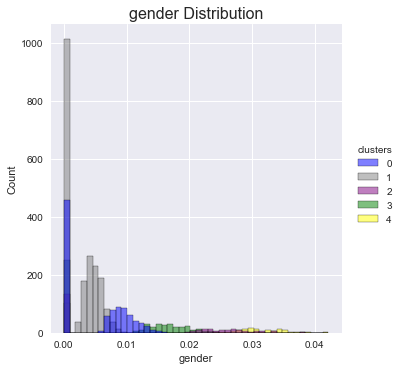

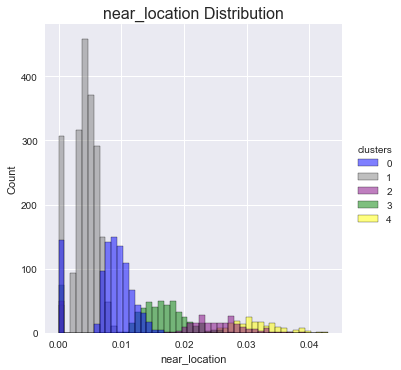

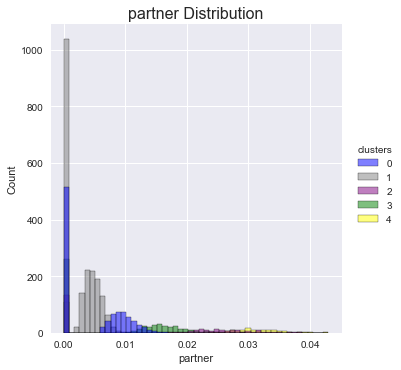

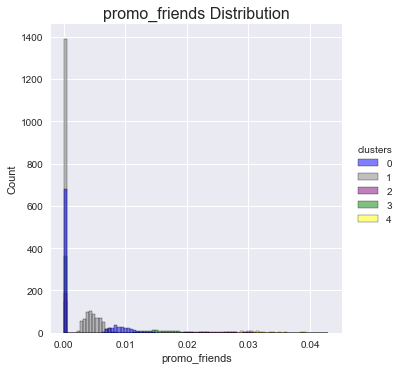

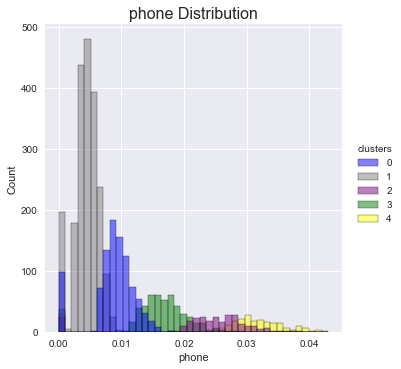

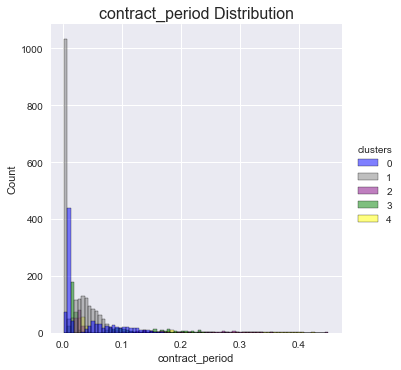

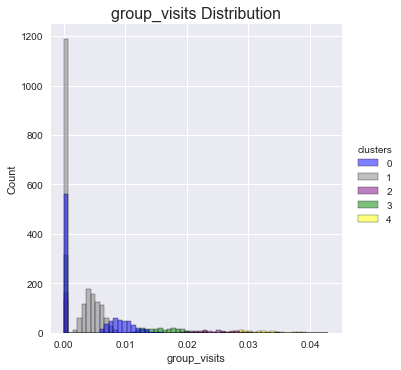

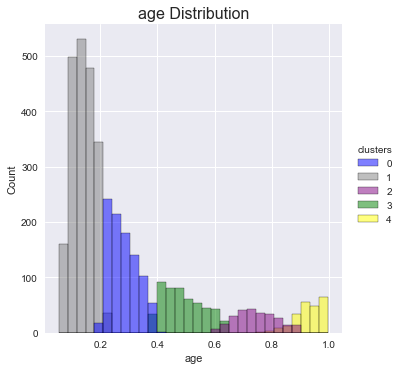

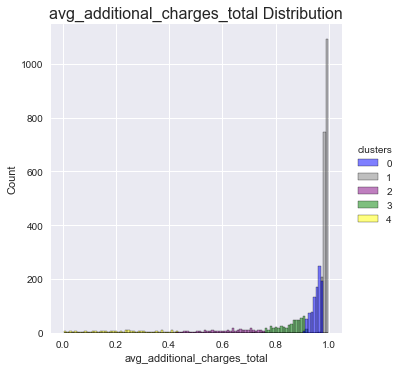

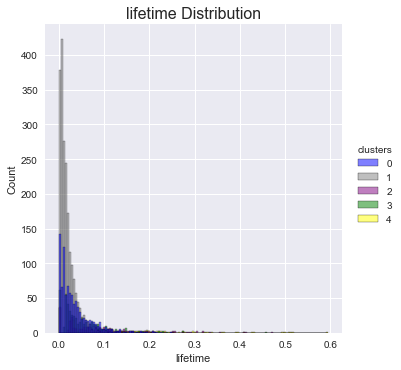

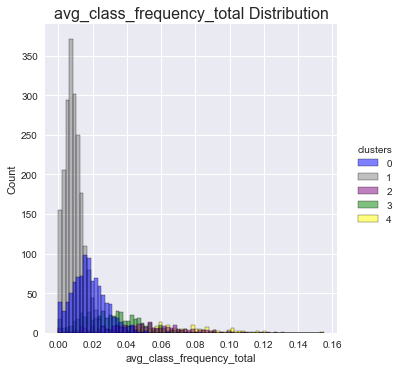

In [33]:
#Distribution of features 

for i in data_scaled.columns.drop('clusters'):
    sns.displot(data_scaled, x=i, hue='clusters', palette = ['blue','grey','purple','green','yellow'])
    plt.title(i + ' Distribution', fontsize= 16)


> - Based on the distribution, it can be seen that the data points within a range fall under a single cluster

In [34]:
# churn rate for each cluster

gym['clusters'] = data_scaled.clusters

churn_rate = pd.crosstab(index = gym.clusters, columns = gym.churn).sort_values(1, ascending = False)
churn_rate['percentage'] = churn_rate[1] / (churn_rate[0] + churn_rate[1]) *100
churn_rate

churn,0,1,percentage
clusters,,,
1,1597,451,22.021484
0,667,287,30.083857
3,344,166,32.549020
2,175,85,32.692308
4,156,72,31.578947


> - The churn rate for customers in cluster 4 is the highest followed by the customers in cluster 2. 
> - The loyal customer are in cluster 0

### Conclusion

- No missing values or duplicates found while preprocessing 
- Correlation matrix was plot and the features which correlated above a certain threshold was removed
- The classes in the target varibale are unequal. So F1 score was taken as a selective measure. Without SMOTE logistic regression was the best model and with smote as well , although other classifier's performnace improved by a bit 
- Dendogram was ploted by taking sample from the dataset to find the number of clusters.
- Kmean was performed to from 5 clusters of customers. Kmeans clusters all the customers withing a scale into the same cluster
- Finally, churn rate for each of the clusters was calculated and it was found that customers belonging to cluster 4 and cluster 2 tend to chrun the most while the customer in cluster 1 are loyal


### Recommendations

- Since the customers in cluster 2 and 4 tend to churn , giving then some special discounts on services and some free sessions might help to retain customers 
- Normally cutsomers leave when they feel demotivated or bored of the gym. So adding new equpments and keeping one on one sessions might motivate the customers and also keep them going to try out new stuffs